In [2]:
# importing libraries that are needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
health_path = '/Users/abdullahwaraich/Downloads/healthexpenditurebyareaandsource.csv'
health_expenditure = pd.read_csv (health_path)
health_cleaned = health_expenditure.dropna()
health_cleaned
health = health_cleaned.drop(columns = ['area_of_expenditure', 'broad_source_of_funding', 'detailed_source_of_funding', 'state'])
health
health_cleaned


,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions
0,1997-98,NSW,Administration,Government,Australian Government,315.0
1,1997-98,NSW,Administration,Government,State and local,120.0
2,1997-98,NSW,Administration,Non-government,Private health insurance funds,314.0
3,1997-98,NSW,Aids and appliances,Government,Australian Government,65.0
4,1997-98,NSW,Aids and appliances,Non-government,Individuals,168.0
...,...,...,...,...,...,...
6773,2011-12,NT,Public hospitals,Non-government,Private health insurance funds,1.0
6774,2011-12,NT,Research,Government,Australian Government,81.0
6775,2011-12,NT,Research,Government,State and local,35.0
6776,2011-12,NT,Research,Non-government,Individuals,0.0


Ok, so the data frame has been condensed into what the first goal is: to plot the total spending in each financial year. 

<AxesSubplot:title={'center':'spending over the years by all govts'}, xlabel='financial_year'>

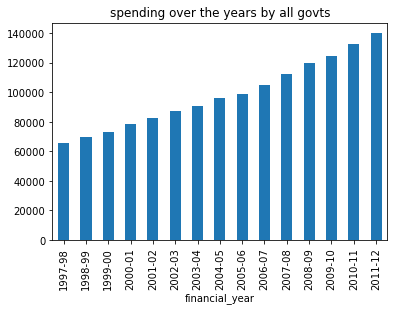

In [55]:
by_year = health.groupby(['financial_year']).real_expenditure_millions.sum()
plt.title('spending over the years by all govts')
by_year.plot(kind  ='bar')
#Plot of spending by year 



<AxesSubplot:title={'center':'Total spending in given period by each state'}, xlabel='state'>

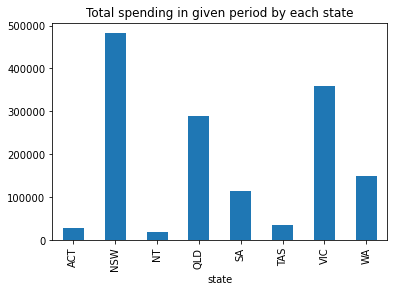

In [54]:
# And now, to find spending be each state over the given time period:
health_expenditure_by_state = health_cleaned.groupby(['state']).real_expenditure_millions.sum()
plt.title('Total spending in given period by each state')
health_expenditure_by_state.plot(kind = 'bar')
#Plot of spending by state 

<AxesSubplot:title={'center':'Total spending from govt and non govt sources for each state'}, xlabel='state,broad_source_of_funding'>

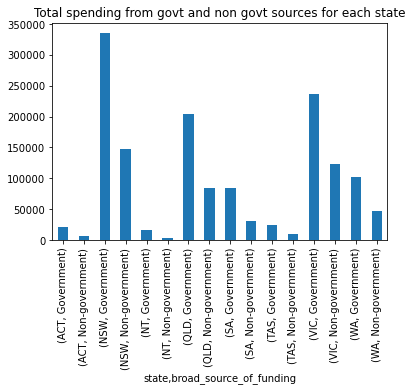

In [52]:
health_expenditure_by_gov = health_cleaned.groupby(['state','broad_source_of_funding']).real_expenditure_millions.sum()
health_expenditure_by_gov
plt.title('Total spending from govt and non govt sources for each state')
health_expenditure_by_gov.plot(kind = 'bar')

<AxesSubplot:xlabel='state,detailed_source_of_funding'>

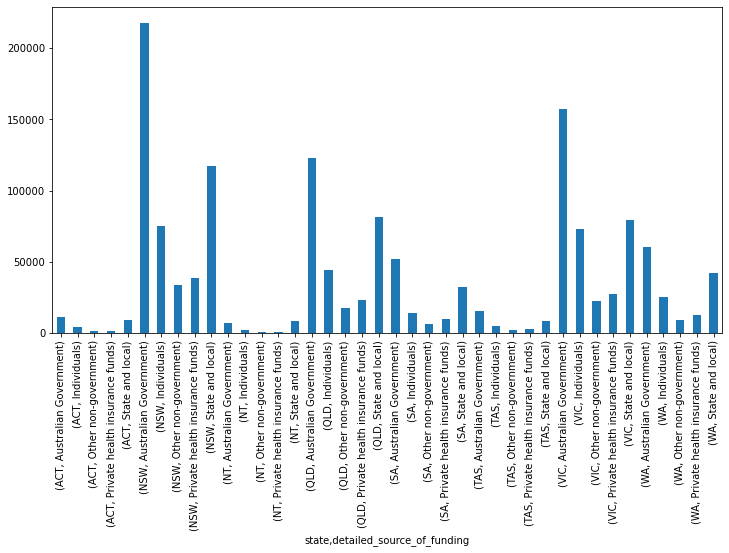

In [6]:
health_expenditure_by_gov = health_cleaned.groupby(['state','detailed_source_of_funding']).real_expenditure_millions.sum()
plt.figure(figsize = (12,6))
health_expenditure_by_gov.plot(kind = 'bar')
#This is the spending by more specific source

In [38]:
health_expenditure_by_gov = health_cleaned.groupby(['state', 'broad_source_of_funding'])
health_expenditure_by_gov.head()


#health_unsure = health_cleaned.drop(columns = ['area_of_expenditure', 'detailed_source_of_funding', 'financial_year'])
#health_unsure
#X_axis = np.arange(len('state'))
#plt.bar(X_axis - 0.2, 'broad_source_of_funding', 0.4, label = 'Girls')
#plt.bar(X_axis + 0.2, ', 0.4, label = 'Boys')


,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions
0,1997-98,NSW,Administration,Government,Australian Government,315.0
1,1997-98,NSW,Administration,Government,State and local,120.0
2,1997-98,NSW,Administration,Non-government,Private health insurance funds,314.0
3,1997-98,NSW,Aids and appliances,Government,Australian Government,65.0
4,1997-98,NSW,Aids and appliances,Non-government,Individuals,168.0
...,...,...,...,...,...,...
369,1997-98,NT,Aids and appliances,Non-government,Other non-government,2.0
370,1997-98,NT,Aids and appliances,Non-government,Private health insurance funds,1.0
371,1997-98,NT,All other medications,Government,Australian Government,0.0
372,1997-98,NT,All other medications,Government,State and local,2.0


In [51]:
health_cleaned.describe()
health_expenditure_by_state = health_cleaned.groupby(['state']).real_expenditure_millions.sum()
print(health_expenditure_by_state)
health_expenditure_by_state.sum()
health_expenditure_total = health_expenditure_by_state.sum()
print('The total health expnditue in milliosn over given period is: ' + str(health_expenditure_total))


state
ACT     28260.0
NSW    482366.0
NT      18915.0
QLD    289676.0
SA     114623.0
TAS     34294.0
VIC    360217.0
WA     149887.0
Name: real_expenditure_millions, dtype: float64
The total health expnditue in milliosn over given period is: 1478238.0


Summarised above is the total expenditure for health by all states from 1997 to 2012 (financial years)
Now, the goal is to determine what each state spent the most on and whether or not it was government or non government funding. So basically just looking for area of expenditure and where the funding is coming from. 

In [9]:
health_expenditure_areas = health_expenditure.groupby(['state','area_of_expenditure']).real_expenditure_millions.sum()
health_expenditure_areas['VIC']



area_of_expenditure
Administration                    7935.0
Aids and appliances              10298.0
All other medications            18573.0
Benefit-paid pharmaceuticals     25903.0
Capital expenditure              14903.0
Community health                 11702.0
Dental services                  26996.0
Medical expense tax rebate           0.0
Medical services                 66086.0
Other health practitioners       15492.0
Patient transport services        6380.0
Private hospitals                30321.0
Public health                     6278.0
Public hospitals                106195.0
Research                         13155.0
Name: real_expenditure_millions, dtype: float64

Above is some code that will allow you to determine the spending (in millions) for different categories (areas) of spending. 

<AxesSubplot:title={'center':'This is the total health expenditure for every year in the given data set'}, xlabel='state,detailed_source_of_funding'>

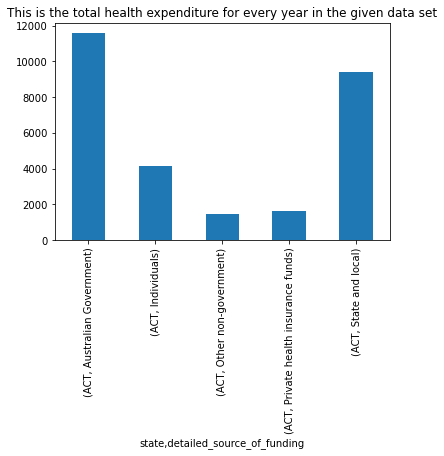

In [50]:
health_areas = health_cleaned.groupby(['state','detailed_source_of_funding']).real_expenditure_millions.sum()
health_areas
plt.title('This is the total health expenditure by ACT for each category over the years in the given data set') # It is possible to do the same for the other states, simply by changing what the input state is given as. 
health_areas.iloc[0:5].plot(kind = 'bar')


#health_expenditure_vic = health_expenditure_areas['VIC']
#print(health_expenditure_vic)
#plt.figure(figsize=(12,10))



In [ ]:
#I will use this to store the actual function and the code below to see if it works.

def spending_by(state): 
    health_expenditure_areas = health_expenditure.groupby(['state','detailed_source_of_funding']).real_expenditure_millions.sum()
    health_expenditure_state = health_expenditure_areas[str(state)].sum()
    health_expenditure_state
    a = int(health_expenditure_state)
    b = int(health_expenditure_total)
    c = round (a/b,4)
    print(c)
    print(str(c*100)+'%')
    


For the below cells, the aim would be to determine what % of all spending is by a particular state (and it will ask the user for the input)

In [ ]:
state = input('What state do you want?') #This will ask for an input (what state?), from there it let's you calculate what percentage of spending is by that particular state.
spending_by(state) 

0.2437
24.37%


So, this tells us that the total percentage of all government spending on Health was 32.62999....% by NSW. This seems quite reasonable, given that NSW has the largest population. We can also use the same function to calculate how much spending by other states. But the fact that we define the variable inside the function can spell trouble, so we will need to fix that later. 

In [ ]:
health_expenditure_areas = health_expenditure.groupby(['state','detailed_source_of_funding']).real_expenditure_millions.sum()
health_expenditure_state = health_expenditure_areas['VIC'].sum()   #This is for VIC. 
health_expenditure_state
a = int(health_expenditure_state)
b = int(health_expenditure_total)
c = round (a/b,4)
print(c)
print(str(c*100)+'%')
#Now, we don't really need to use this much code to calculate the percentages, we can just use the function that was defined earlier.

0.2437
24.37%


So this was pretty much just a little bit of visualisation, and a little bit of just getting used to using data frames.... 
